1. Calculate levered returns for Bitcoin (leverage = 4).

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('seaborn-v0_8')

In [2]:
close = pd.read_csv('close.csv',parse_dates=[0],index_col='Date')

In [3]:
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,108.4067,383.6150,1.2628,1214.6000,38.9529,16804.7109
2014-10-02,107.9719,375.0720,1.2624,1214.2000,38.8341,16801.0508
2014-10-03,109.8762,359.5120,1.2671,1192.2000,39.1142,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,242.8827,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,240.7773,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,241.1346,34529.4492


In [4]:
btc = close['BTC-USD'].dropna().to_frame().copy()
btc

,BTC-USD
Date,
2014-10-01,383.6150
2014-10-02,375.0720
2014-10-03,359.5120
2014-10-04,328.8660
2014-10-05,320.5100
...,...
2021-05-26,39294.1992
2021-05-27,38436.9688
2021-05-28,35697.6055


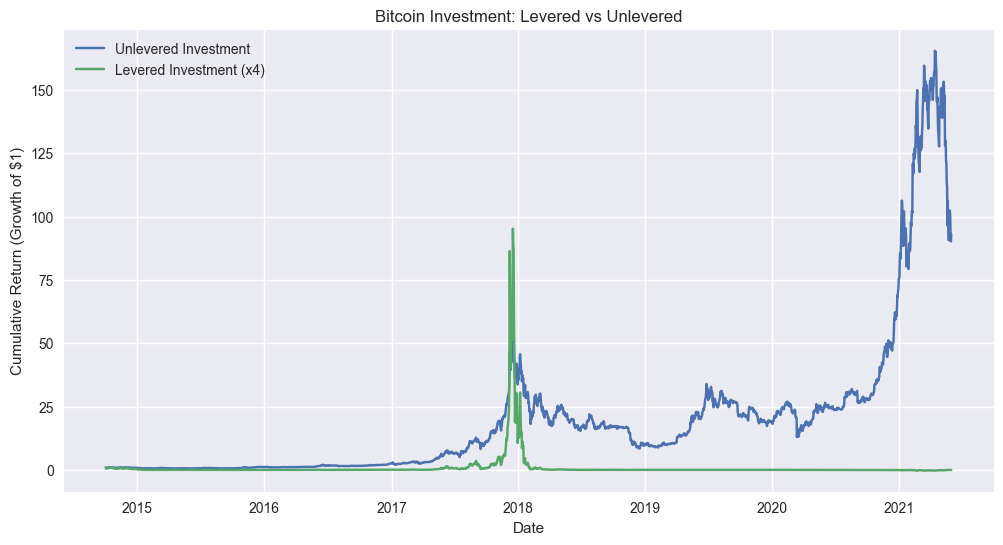

Trading Bitcoin with extremely high leverage (>100) is generally not a good idea without advanced risk management tools. High leverage amplifies both gains and losses, making it very easy to lose your entire investment (or more) with even small adverse price movements. This can lead to rapid liquidation and significant financial risk.


In [5]:
# 1. Calculate daily returns
btc['Return'] = btc['BTC-USD'].pct_change()

# 2. Calculate levered returns (leverage = 4)
leverage = 4
btc['Levered_Return'] = btc['Return'] * leverage

# 3. Calculate cumulative returns for both unlevered and levered investments
btc['Cumulative_Unlevered'] = (1 + btc['Return']).cumprod()
btc['Cumulative_Levered'] = (1 + btc['Levered_Return']).cumprod()

# 4. Visualize and compare
plt.figure(figsize=(12,6))
plt.plot(btc.index, btc['Cumulative_Unlevered'], label='Unlevered Investment')
plt.plot(btc.index, btc['Cumulative_Levered'], label='Levered Investment (x4)')
plt.title('Bitcoin Investment: Levered vs Unlevered')
plt.ylabel('Cumulative Return (Growth of $1)')
plt.xlabel('Date')
plt.legend()
plt.show()

# 5. Discussion
print("Trading Bitcoin with extremely high leverage (>100) is generally not a good idea without advanced risk management tools. High leverage amplifies both gains and losses, making it very easy to lose your entire investment (or more) with even small adverse price movements. This can lead to rapid liquidation and significant financial risk.")